In [132]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('jwan392').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor

In [133]:
# Use Spark to read in the Ecommerce Customers csv file. You can infer csv schemas. 
df = spark.read.csv("./train.csv",inferSchema=True,header=True)
test=spark.read.csv("./test.csv",inferSchema=True,header=True)

In [134]:
df.printSchema()

root
 |-- datetime: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weather: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- comment: string (nullable = true)



In [135]:
df.describe().show()
test.describe().show()

+-------+-------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------+
|summary|     datetime|            season|            holiday|        workingday|           weather|             temp|             atemp|          humidity|         windspeed|           casual|        registered|             count|comment|
+-------+-------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------+
|  count|        10886|             10886|              10886|             10886|             10886|            10886|             10886|             10886|             10886|            10886|             10886|             10886|      0|
|   mean|         null|2.506613999632555

In [136]:
df.show()

+--------------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+-------+
|      datetime|season|holiday|workingday|weather| temp| atemp|humidity|windspeed|casual|registered|count|comment|
+--------------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+-------+
| 2011/1/1 0:00|     1|      0|         0|      1| 50.0|  50.0|     150|      0.0|     3|        13|   16|   null|
| 2011/1/1 1:00|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     8|        32|   40|   null|
| 2011/1/1 2:00|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     5|        27|   32|   null|
| 2011/1/1 3:00|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|     3|        10|   13|   null|
| 2011/1/1 4:00|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|     0|         1|    1|   null|
| 2011/1/1 5:00|     1|      0|         0|      2| 9.84| 12.88|      75|   6.003

In [137]:
df.dtypes

[('datetime', 'string'),
 ('season', 'int'),
 ('holiday', 'int'),
 ('workingday', 'int'),
 ('weather', 'int'),
 ('temp', 'double'),
 ('atemp', 'double'),
 ('humidity', 'int'),
 ('windspeed', 'double'),
 ('casual', 'int'),
 ('registered', 'int'),
 ('count', 'int'),
 ('comment', 'string')]

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib

In [139]:
train =  df.toPandas()
test_pd = test.toPandas()

In [140]:
#2.2 Data Description

train.head()
train.info()
test_pd.info()
print(train.head(2))
print(train.tail(4))
print(train.dtypes)
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int32  
 2   holiday     10886 non-null  int32  
 3   workingday  10886 non-null  int32  
 4   weather     10886 non-null  int32  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int32  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int32  
 10  registered  10886 non-null  int32  
 11  count       10886 non-null  int32  
 12  comment     0 non-null      object 
dtypes: float64(3), int32(8), object(2)
memory usage: 765.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 no

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


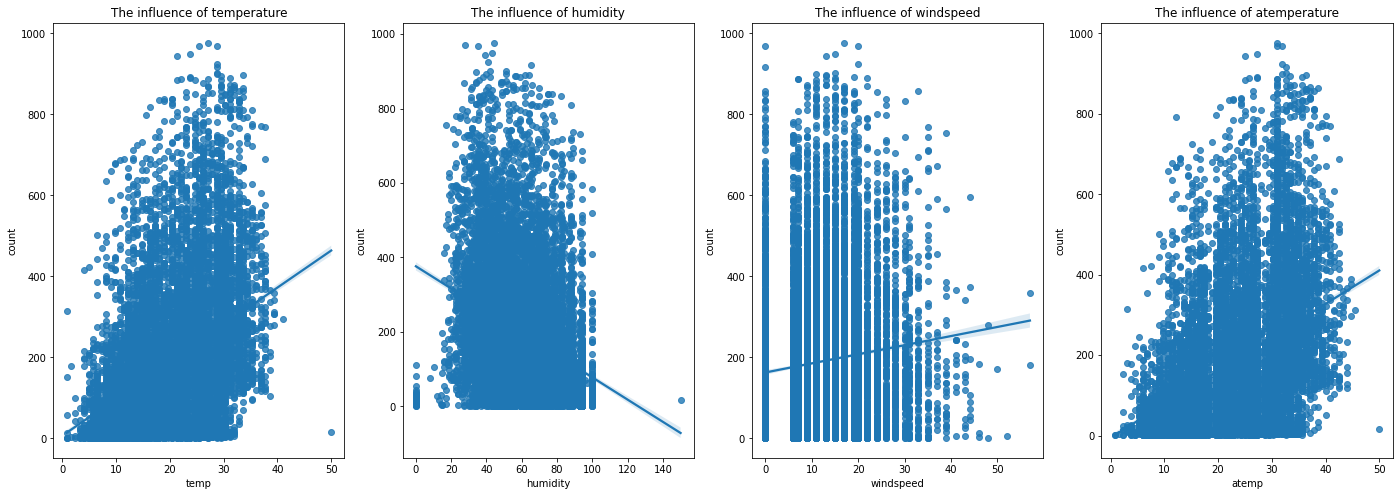

In [141]:
#2.3 Data Exploration with visualisations
fig, axes = plt.subplots(1,4,figsize=(24,8))
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)
sns.regplot(train['temp'],train['count'],ax=ax1)
sns.regplot(train['humidity'],train['count'],ax=ax2)
sns.regplot(train['windspeed'],train['count'],ax=ax3)
sns.regplot(train['atemp'],train['count'],ax=ax4)
ax1.set_title("The influence of temperature")
ax2.set_title("The influence of humidity")
ax3.set_title("The influence of windspeed")
ax4.set_title("The influence of atemperature")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

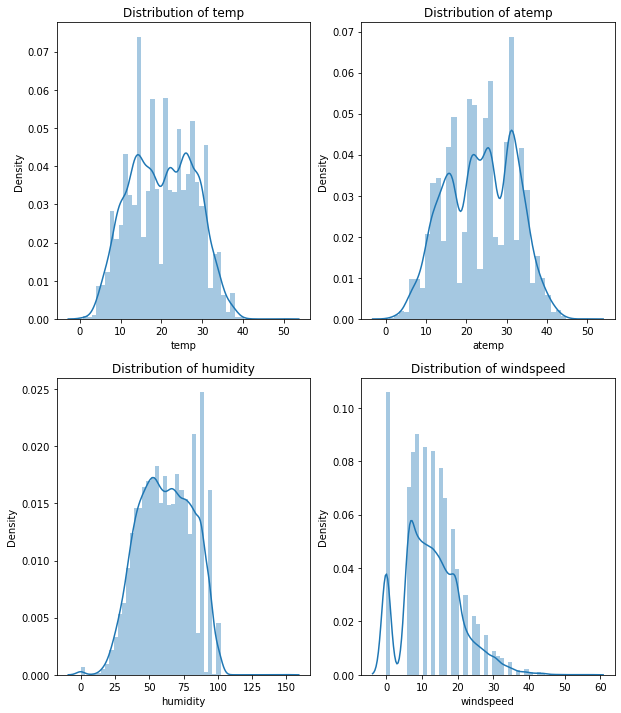

In [142]:
#2.4 Data Quality(Errors, missing values)
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10,12)
sns.distplot(train['temp'],ax=axes[0,0])
sns.distplot(train['atemp'],ax=axes[0,1])
sns.distplot(train['humidity'],ax=axes[1,0])
sns.distplot(train['windspeed'],ax=axes[1,1])
axes[0,0].set(title='Distribution of temp')
axes[0,1].set(title='Distribution of atemp')
axes[1,0].set(title='Distribution of humidity')
axes[1,1].set(title='Distribution of windspeed')
plt.show()

count         1.000000
registered    0.970948
casual        0.690414
temp          0.393763
atemp         0.389259
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317400
Name: count, dtype: float64
count         1.000000
registered    0.970948
casual        0.690414
temp          0.393763
atemp         0.389259
humidity      0.317400
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64


/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


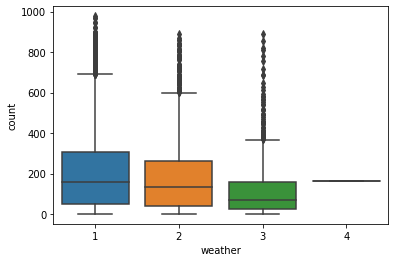

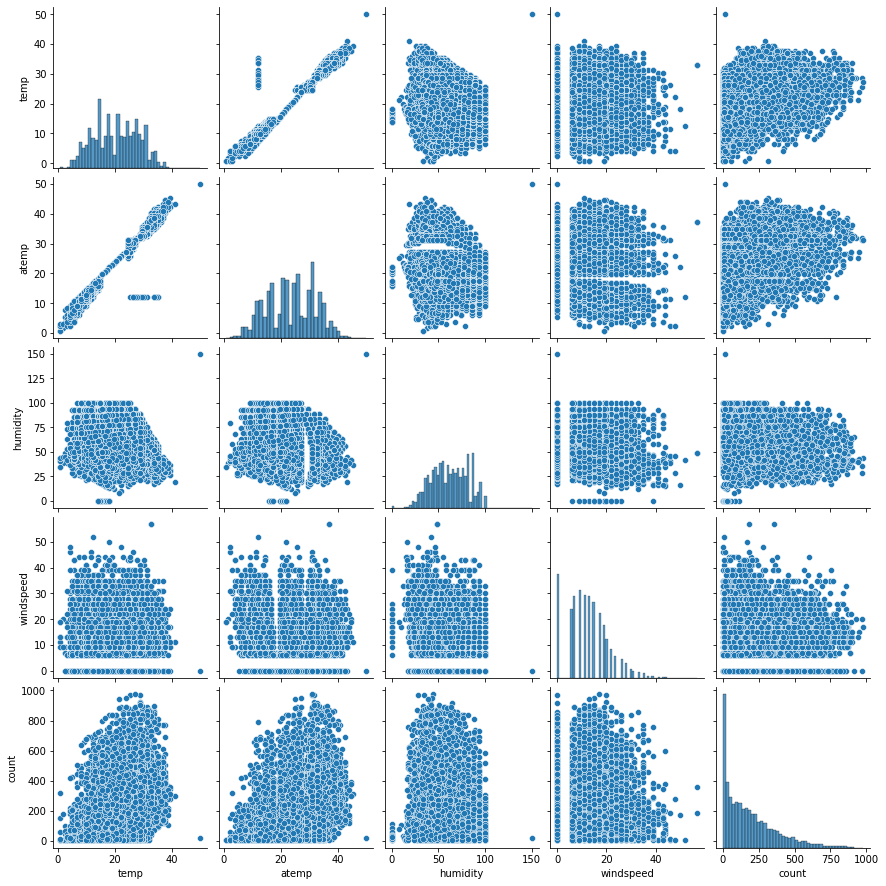

In [143]:
#3. Data Preparation
#3.1 Data Selection
# Caculating the correlation coefficient
corr_df = train.corr()
difference_order = corr_df['count'].sort_values(ascending=False)
difference_order_abs = abs(corr_df['count']).sort_values(ascending=False)
print(difference_order)
print(difference_order_abs)
train.describe().T
# The influence of the weather
sns.boxplot(train['weather'],train['count'])
# The influence of temp, atemp, humidty and windspeed   
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed', 'count']])


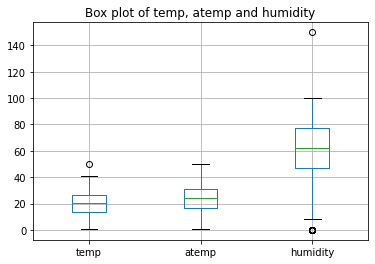

In [144]:
#3.2 Data Clean
index = ['temp','atemp','humidity']
train.boxplot(index)
plt.title('Box plot of temp, atemp and humidity')
plt.show()

In [145]:
train.drop(train[train['temp'] >= 50].index, inplace = True)

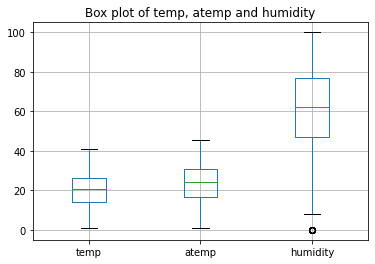

In [146]:
index = ['temp','atemp','humidity']
train.boxplot(index)
plt.title('Box plot of temp, atemp and humidity')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 1 to 10885
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           10885 non-null  object 
 1   season             10885 non-null  int32  
 2   holiday            10885 non-null  int32  
 3   workingday         10885 non-null  int32  
 4   weather            10885 non-null  int32  
 5   temp               10885 non-null  float64
 6   atemp              10885 non-null  float64
 7   humidity           10885 non-null  int32  
 8   windspeed          10885 non-null  float64
 9   casual             10885 non-null  int32  
 10  registered         10885 non-null  int32  
 11  count              10885 non-null  int32  
 12  comment            0 non-null      object 
 13  casual of rentals  10885 non-null  int32  
dtypes: float64(3), int32(9), object(2)
memory usage: 808.0+ KB


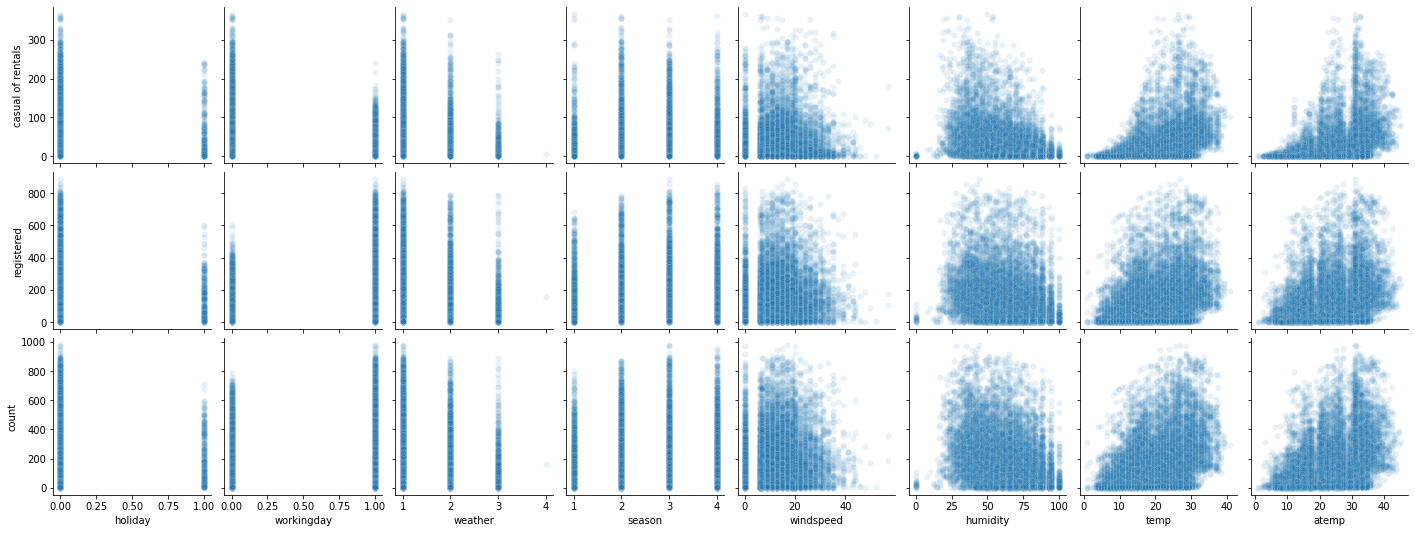

In [147]:
#3.3 Data must be appropriately constructed through the creation of new features/variables, and/or data repositories/tables.
# In order to facilitate the overall processing, the test set and training set are now merged
train["casual of rentals"] = train['count'] - train['registered']
train.info()
sns.pairplot(train, x_vars=['holiday','workingday','weather','season','windspeed','humidity','temp','atemp'],
             y_vars=['casual of rentals','registered','count'] , plot_kws={'alpha': 0.1})
plt.show()

In [148]:
#3.4 Data Integration
Bike_data= pd.concat([train,test_pd],ignore_index=True)
Bike_data.head()
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17378 non-null  object 
 1   season             17378 non-null  int32  
 2   holiday            17378 non-null  int32  
 3   workingday         17378 non-null  int32  
 4   weather            17378 non-null  int32  
 5   temp               17378 non-null  float64
 6   atemp              17378 non-null  float64
 7   humidity           17378 non-null  int32  
 8   windspeed          17378 non-null  float64
 9   casual             10885 non-null  float64
 10  registered         10885 non-null  float64
 11  count              10885 non-null  float64
 12  comment            0 non-null      object 
 13  casual of rentals  10885 non-null  float64
dtypes: float64(7), int32(5), object(2)
memory usage: 1.5+ MB


In [149]:
#3.5 Formatting Data
Bike_data['date']=Bike_data.datetime.apply( lambda c : c.split( )[0])
Bike_data['hour']=Bike_data.datetime.apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
Bike_data['year']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('/')[0]).astype('int')
Bike_data['month']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('/')[1]).astype('int')
Bike_data['weekday']=Bike_data.date.apply( lambda c : datetime.strptime(c,'%Y/%m/%d').isoweekday())

Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17378 non-null  object 
 1   season             17378 non-null  int32  
 2   holiday            17378 non-null  int32  
 3   workingday         17378 non-null  int32  
 4   weather            17378 non-null  int32  
 5   temp               17378 non-null  float64
 6   atemp              17378 non-null  float64
 7   humidity           17378 non-null  int32  
 8   windspeed          17378 non-null  float64
 9   casual             10885 non-null  float64
 10  registered         10885 non-null  float64
 11  count              10885 non-null  float64
 12  comment            0 non-null      object 
 13  casual of rentals  10885 non-null  float64
 14  date               17378 non-null  object 
 15  hour               17378 non-null  int64  
 16  year               173

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 1 to 10885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10885 non-null  int32  
 1   holiday     10885 non-null  int32  
 2   workingday  10885 non-null  int32  
 3   weather     10885 non-null  int32  
 4   temp        10885 non-null  float64
 5   humidity    10885 non-null  int32  
 6   windspeed   10885 non-null  float64
 7   count       10885 non-null  int32  
dtypes: float64(2), int32(6)
memory usage: 425.3 KB


/tmp/ipykernel_6333/2170567670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value+'_log'] = np.log1p(data[value])
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility

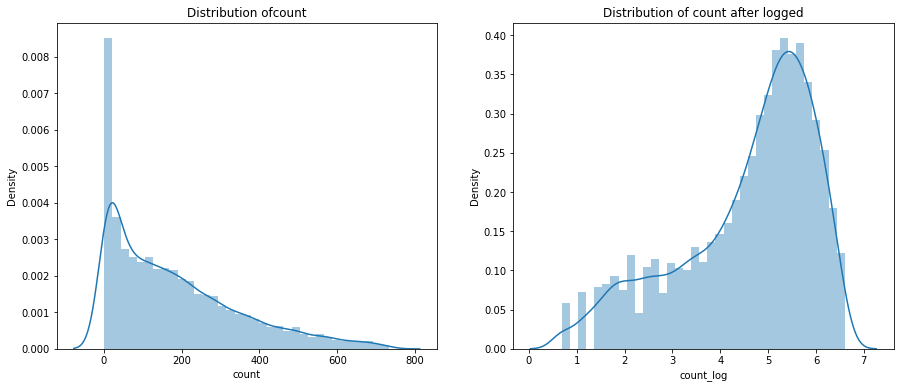

In [150]:
#4.1 Data reduction
#Delete the column comment
train = train.drop('comment', axis=1)
train = train.drop('atemp', axis=1)
train = train.drop('registered', axis=1)
train = train.drop('casual', axis=1)
train = train.drop('casual of rentals', axis=1)
train = train.drop('datetime', axis=1)
train.info()
#4.2 Data Transformations (taking the log of a distribution)
def drop_outlier(data,value):
    train_NoOutliers = np.abs(data[value]-data[value].mean())<(3*data[value].std())
    data = data.loc[train_NoOutliers]
    
    data[value+'_log'] = np.log1p(data[value])
    a, [ax1, ax2] = plt.subplots(1,2, figsize=(15,6))

    sns.distplot(data[value], ax=ax1)
    ax1.set_title('Distribution of'+ value)

    sns.distplot(data[value+'_log'], ax=ax2)
    ax2.set_title('Distribution of '+ value + ' after logged')
    return data
train = drop_outlier(train,'count')


In [151]:
train_std = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]

train_std.reset_index(drop=True,inplace=True)
train_std.shape

datetimecol = test_pd['datetime']

combine_train_test = train_std.append(test_pd,ignore_index=True)


print ('combined data sets:',combine_train_test.shape)

row_train = train_std.shape[0]
row_test = test_pd.shape[0]
print('train set：',row_train,'\ntest set：',row_test)


combine_feature = Bike_data[['temp','humidity','weather','season','year','weather',
                                      'month','weekday','hour','workingday','windspeed','count']]

combine_feature.info()

cols = ['month','season','weather','year']
combine_feature = pd.get_dummies(combine_feature,columns=cols,prefix_sep='_')
combine_feature.info()


mask = pd.notnull(combine_feature['count'])
train_data = combine_feature[mask]
test_data = combine_feature[~mask]

train_data.shape
test_data.shape

source_X = train_data.drop(['count'],axis = 1)

source_y  = np.log1p(train_data['count'])

pred_X = test_data.drop(['count'],axis = 1)



combined data sets: (17156, 11)
train set： 10663 
test set： 6493
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        17378 non-null  float64
 1   humidity    17378 non-null  int32  
 2   weather     17378 non-null  int32  
 3   season      17378 non-null  int32  
 4   year        17378 non-null  int64  
 5   weather     17378 non-null  int32  
 6   month       17378 non-null  int64  
 7   weekday     17378 non-null  int64  
 8   hour        17378 non-null  int64  
 9   workingday  17378 non-null  int32  
 10  windspeed   17378 non-null  float64
 11  count       10885 non-null  float64
dtypes: float64(3), int32(5), int64(4)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 

/tmp/ipykernel_6333/2321880053.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine_train_test = train_std.append(test_pd,ignore_index=True)


In [152]:
#Transfer to pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext
sqlContest = SQLContext(spark)
train_df = sqlContest.createDataFrame(train)
train_df.printSchema()

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


root
 |-- season: long (nullable = true)
 |-- holiday: long (nullable = true)
 |-- workingday: long (nullable = true)
 |-- weather: long (nullable = true)
 |-- temp: double (nullable = true)
 |-- humidity: long (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- count: long (nullable = true)
 |-- count_log: double (nullable = true)



In [153]:
train_df.columns

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'count',
 'count_log']

In [154]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [155]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed'],
    outputCol="features")

In [156]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(train_df)

In [157]:
# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- season: long (nullable = true)
 |-- holiday: long (nullable = true)
 |-- workingday: long (nullable = true)
 |-- weather: long (nullable = true)
 |-- temp: double (nullable = true)
 |-- humidity: long (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- count: long (nullable = true)
 |-- count_log: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(season=1, holiday=0, workingday=0, weather=1, temp=9.02, humidity=80, windspeed=0.0, count=40, count_log=3.7135720667043075, features=DenseVector([1.0, 0.0, 0.0, 1.0, 9.02, 80.0, 0.0]))]

In [158]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'count')
final_data.show()

+--------------------+-----+
|            features|count|
+--------------------+-----+
|[1.0,0.0,0.0,1.0,...|   40|
|[1.0,0.0,0.0,1.0,...|   32|
|[1.0,0.0,0.0,1.0,...|   13|
|[1.0,0.0,0.0,1.0,...|    1|
|[1.0,0.0,0.0,2.0,...|    1|
|[1.0,0.0,0.0,1.0,...|    2|
|[1.0,0.0,0.0,1.0,...|    3|
|[1.0,0.0,0.0,1.0,...|    8|
|[1.0,0.0,0.0,1.0,...|   14|
|[1.0,0.0,0.0,1.0,...|   36|
|[1.0,0.0,0.0,1.0,...|   56|
|[1.0,0.0,0.0,1.0,...|   84|
|[1.0,0.0,0.0,2.0,...|   94|
|[1.0,0.0,0.0,2.0,...|  106|
|[1.0,0.0,0.0,2.0,...|  110|
|[1.0,0.0,0.0,2.0,...|   93|
|[1.0,0.0,0.0,2.0,...|   67|
|[1.0,0.0,0.0,3.0,...|   35|
|[1.0,0.0,0.0,3.0,...|   37|
|[1.0,0.0,0.0,2.0,...|   36|
+--------------------+-----+
only showing top 20 rows



In [171]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [172]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|              7534|
|   mean|183.00026546323335|
| stddev|167.13340302248574|
|    min|                 1|
|    max|               734|
+-------+------------------+

+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|              3204|
|   mean|183.06429463171037|
| stddev|165.63966092045283|
|    min|                 1|
|    max|               731|
+-------+------------------+



In [173]:
lr = LinearRegression(labelCol='count',featuresCol ='features')

In [174]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

22/10/16 03:27:54 WARN Instrumentation: [1c00be21] regParam is zero, which might cause numerical instability and overfitting.


In [163]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [21.34425628343619,-8.725117516721395,-12.334889274668065,7.41747463912504,6.887209123648836,-2.8502703563872727,0.5265094776705359] Intercept: 158.08038026955668


In [164]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [165]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------------------+
|          residuals|
+-------------------+
| -64.21139841992228|
| -97.71577795473252|
| -84.05898162583634|
| -94.70912902340424|
| -75.42073302321516|
| -79.05723245186819|
|-11.967915404163762|
| -8.967915404163762|
| 14.608092322601351|
| 39.504392872784535|
|-102.71451418241642|
| -70.74407396143047|
| -68.50373423223316|
| -47.49401521737431|
| 42.748559087443226|
| -80.04526045389082|
| -94.80852744417345|
| -93.90522785640366|
| -70.20468714362912|
|-54.312016675541045|
+-------------------+
only showing top 20 rows

RSME: 145.60968606448586


In [166]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.26439525587689705


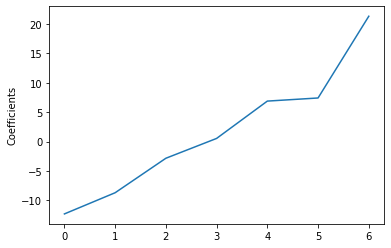

In [167]:
import numpy as np
beta = np.sort(lrModel.coefficients)
# Plot the data.
plt.plot(beta)
# Add a label to the data.
plt.ylabel('Coefficients')
# Show the graph. 
plt.show()

In [168]:
final_data.describe().show()

+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|             10738|
|   mean|183.01937046004844|
| stddev|  166.681398055565|
|    min|                 1|
|    max|               734|
+-------+------------------+



In [41]:
train_data.describe().show()

+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|              7479|
|   mean|183.43989838213665|
| stddev|167.21501594797397|
|    min|                 1|
|    max|               734|
+-------+------------------+



In [178]:
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","count","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="count",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-----+--------------------+
|        prediction|count|            features|
+------------------+-----+--------------------+
|61.798430128792816|    6|[1.0,0.0,0.0,1.0,...|
| 98.95710128258534|    4|[1.0,0.0,0.0,1.0,...|
|122.38223426809358|   37|[1.0,0.0,0.0,1.0,...|
| 109.9877800508608|   19|[1.0,0.0,0.0,1.0,...|
|105.11544776672245|   15|[1.0,0.0,0.0,1.0,...|
+------------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.233752


In [179]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="count", outputCol="countIndex")
output_fixed = indexer.fit(output).transform(output)

In [180]:
final_data = output_fixed.select("features",'count')

In [181]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [182]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [183]:
dtc = DecisionTreeClassifier(labelCol='countIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='countIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='countIndex',featuresCol='features')

In [184]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)

In [185]:
rfr = RandomForestRegressor(labelCol='count',featuresCol='features')

In [186]:
rfr_model = rfr.fit(train_data)

In [187]:
predictions = rfr_model.transform(test_data)

# Select example rows to display.
predictions.select("features","count", "prediction").show(5)

+--------------------+-----+------------------+
|            features|count|        prediction|
+--------------------+-----+------------------+
|[1.0,0.0,0.0,1.0,...|    1| 74.64632186376375|
|[1.0,0.0,0.0,1.0,...|    1| 74.64632186376375|
|[1.0,0.0,0.0,1.0,...|   25|  106.993975411741|
|[1.0,0.0,0.0,1.0,...|   34|115.83479367931753|
|[1.0,0.0,0.0,1.0,...|   37|115.65700133160301|
+--------------------+-----+------------------+
only showing top 5 rows



In [188]:
rfr_predictions = rfr_model.transform(test_data)
print("Random Forest Regression")
print(my_multiple_eval.evaluate(rfc_predictions)*200)

Random Forest Regression


22/10/16 03:29:41 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB


0.8258064106506445


In [189]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="count", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 141.378
